In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.transpiler import InstructionProperties
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import PassManager

service = QiskitRuntimeService()

from qiskit.circuit.classical import expr   # allows classical logic on mid circuit measurement

In [2]:
backend1 = service.backend("ibm_sherbrooke") 
target = backend1.target
basis_gates = list(target.operation_names)

In [3]:
def get_ghz_circ_static(num_qubit):
    if num_qubit%2==1:                                                     #odd no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-1)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-1):
            qc.cx(i,i+1)
            qc.cx(num_qubit-i-1,num_qubit-i-2)
        

    else:                                                                    #even no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-2)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-2):
            qc.cx(i,i+1)
            qc.cx(num_qubit-1-i-1,num_qubit-i-3)
        qc.cx(num_qubit-2,num_qubit-1)
    for i in range(num_qubit):
        qc.measure(qr[i],cr2[i])
    return qc

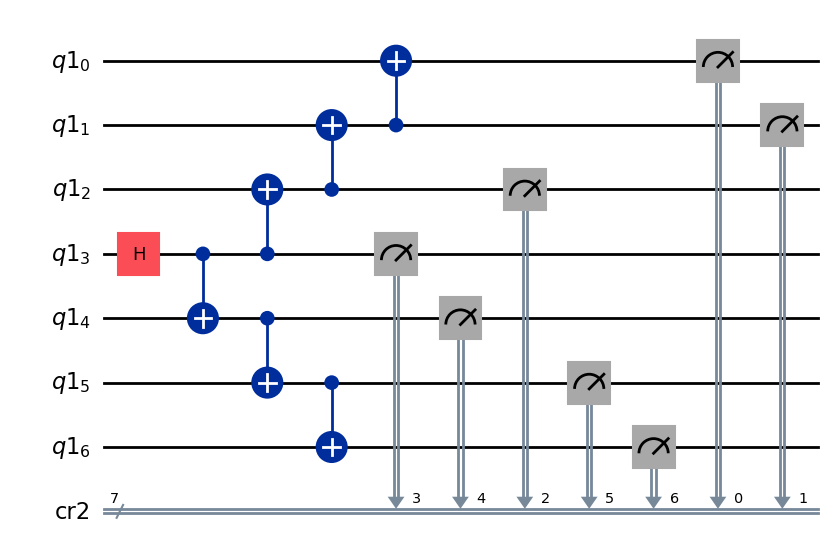

In [4]:
qc = get_ghz_circ_static(num_qubit=7)
qc.draw("mpl")

In [5]:
#dynamic circuit using qubit-reuse in aersimulator

In [6]:
def get_ghz_circ_static_1(num_qubit):
    if num_qubit%2==1:                                                     #odd no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-1)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-1):
            qc.cx(i,i+1)
            qc.cx(num_qubit-i-1,num_qubit-i-2)
        

    else:                                                                    #even no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-2)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-2):
            qc.cx(i,i+1)
            qc.cx(num_qubit-1-i-1,num_qubit-i-3)
        qc.cx(num_qubit-2,num_qubit-1)
    for i in range(num_qubit):
        qc.measure(qr[i],cr2[i])
    return qc

In [7]:
#creating dynamic circuit from a separate static circuit
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

def get_ghz_circ_dynamic_2(num_qubit):
    qc=get_ghz_circ_static_1(num_qubit)
    aer_sim = AerSimulator()
    pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1, init_method="qubit_reuse")
    transpiled_qc = pm.run(qc)
    
    return transpiled_qc

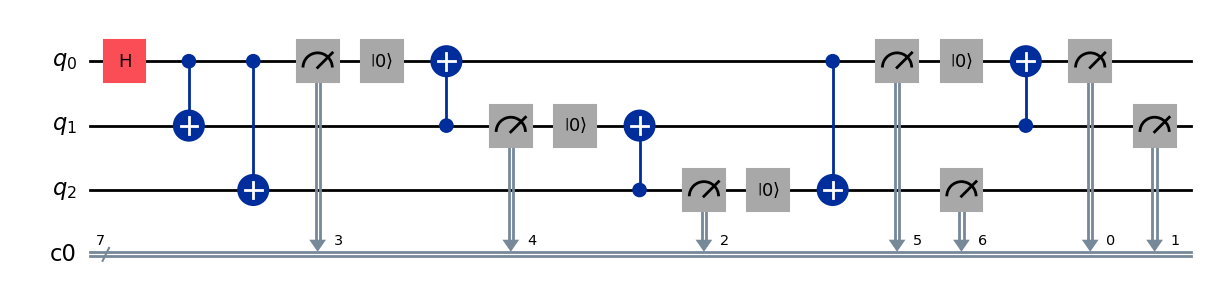

In [8]:
qc = get_ghz_circ_dynamic_2(num_qubit=7)
qc.draw("mpl")

In [9]:
#Creating list of circuits[Static_1, Dynamic1_1, Dynamic2_1, Static_1, Dynamic1_1, Dynamic2_1,...,Static_2, Dynamic1_2, Dynamic2_2, Static_2, Dynamic1_2, Dynamic2_2,...] i.e. some copies of each of them

min_qubit=11
max_num_qubit=15
copies=5

#qc_list_dynamic_1=[]
#qc_list_dynamic_2=[]
#qc_list_static=[]
#observables=[]

qc_list=[]
num_qubit_list=list(range(min_qubit,max_num_qubit+1,2))
for num_qubit in num_qubit_list:
    for i in range(copies):
        qc_list.append(get_ghz_circ_static(num_qubit))
        #qc_list.append(get_ghz_circ_dynamic_1(num_qubit))
        qc_list.append(get_ghz_circ_dynamic_2(num_qubit))
print(num_qubit_list)

[11, 13, 15]


In [10]:
#Ideal Simulation with AerSimulator
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler
 
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=2,basis_gates=basis_gates)
qc_transpiled_list=[]

qc_transpiled_list_ideal = pm.run(qc_list)

In [11]:
sampler = Sampler(backend=aer_sim)
result_ideal = sampler.run(qc_transpiled_list_ideal).result()

In [12]:
print(result_ideal)
len(result_ideal)

PrimitiveResult([PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=11>))), PubResult(data=DataBin(c2=BitArray(<shape=(), num_shots=1024, num_bits=11>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=11>))), PubResult(data=DataBin(c4=BitArray(<shape=(), num_shots=1024, num_bits=11>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=11>))), PubResult(data=DataBin(c6=BitArray(<shape=(), num_shots=1024, num_bits=11>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=11>))), PubResult(data=DataBin(c8=BitArray(<shape=(), num_shots=1024, num_bits=11>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=11>))), PubResult(data=DataBin(c10=BitArray(<shape=(), num_shots=1024, num_bits=11>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(c12=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=

30

In [14]:
# For getting list of ideal counts (argument required for Fidelity)
counts_list_ideal=[]
k=0
for i in range(len(num_qubit_list)):  
    for j in range(copies):
        data_static = result_ideal[(2*i*copies)+(2*j)].data    
        #data_dynamic_1 = result_ideal[(3*i*copies)+((3*j)+1)].data 
        data_dynamic_2 = result_ideal[(2*i*copies)+((2*j)+1)].data

        print(data_static)
        #print(data_dynamic_1)
        print(data_dynamic_2)
        
        counts_static=data_static.cr2.get_counts()
        #counts_dynamic_1=data_dynamic_1.cr2.get_counts()
        
        # Replacing 'cr2' with the appropriate attribute if needed
        dynamic_2_attr_name = f'c{2*(k+1)}'
        if hasattr(data_dynamic_2, dynamic_2_attr_name):
            counts_dynamic_2 = getattr(data_dynamic_2, dynamic_2_attr_name).get_counts()
        else:
            raise AttributeError(f"{dynamic_2_attr_name} not found in data_dynamic_2")
        
        counts_list_ideal.append(counts_static)
        #counts_list_ideal.append(counts_dynamic_1)
        counts_list_ideal.append(counts_dynamic_2)
        k=k+1

DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(c2=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(c4=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(c6=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(c8=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(c10=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c12=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c14=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c16=BitArray(<shape=(), num_shots=1024, num_bits=13

In [15]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

 
# Save an IBM Quantum account and set it as your default account.

 
# Load saved credentials
service = QiskitRuntimeService()
backend_name = "ibm_sherbrooke"
service = QiskitRuntimeService()
backend = service.get_backend(backend_name)
pm = generate_preset_pass_manager(optimization_level=2, backend=backend, basis_gates=basis_gates)
qc_transpiled_list = pm.run(qc_list)

In [16]:
#Executing the circuit
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(backend=backend)

from qiskit_ibm_runtime import Options
 
# Estimator and Sampler now have different options
options = sampler.options
 
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = 'XY4'
#dynamical_decoupling={'enable':True, 'sequence_type':'XpXm'}
job = sampler.run(qc_transpiled_list,shots=1024)
print(job.job_id())

cthpm5r4gjh0008ns000


In [17]:
#Post-processing
import matplotlib.pyplot as plt
import statistics
from qiskit_ibm_runtime import QiskitRuntimeService

job_id = 'cthpm5r4gjh0008ns000' #Sherbrooke

service = QiskitRuntimeService()
job = service.job(job_id)
result_real = job.result()

In [18]:
print(result_real)
len(result_real)

PrimitiveResult([PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=11>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(c2=BitArray(<shape=(), num_shots=1024, num_bits=11>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=11>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(c4=BitArray(<shape=(), num_shots=1024, num_bits=11>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=11>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(c6=BitArray(<shape=(), num_shots=1024, num_bits=11>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=11>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(c8=BitArray(<shape=(), num_shots=1024, num_bits=11>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_

30

In [19]:
#Finding the metrics of the job
result_metric_real=job.metrics()
print(result_metric_real)

{'timestamps': {'created': '2024-07-26T09:19:19.23955Z', 'finished': '2024-07-26T09:25:50.535Z', 'running': '2024-07-26T09:23:59.753Z'}, 'bss': {'seconds': 78}, 'usage': {'quantum_seconds': 78, 'seconds': 78}, 'executions': 30720, 'num_circuits': 30, 'num_qubits': [127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127], 'circuit_depths': [53, 209, 50, 209, 57, 217, 57, 209, 53, 209, 61, 256, 61, 256, 57, 256, 61, 256, 61, 256, 66, 311, 66, 311, 65, 303, 66, 303, 59, 311], 'qiskit_version': 'qiskit_ibm_runtime-0.23.0,qiskit-1.1.0*,qiskit_aer-0.13.3*,qiskit_experiments-0.7.0', 'estimated_start_time': '2024-07-26T09:23:47.106Z', 'estimated_completion_time': '2024-07-26T09:25:04.719Z', 'caller': 'qiskit_ibm_runtime~sampler.py'}


In [21]:
# For getting list of real counts of IBM brisbane (argument required for Fidelity)
counts_list_real=[]
k=0
for i in range(len(num_qubit_list)):  
    for j in range(copies):
        data_static = result_real[(2*i*copies)+(2*j)].data    
        #data_dynamic_1 = result_real[(3*i*copies)+((3*j)+1)].data 
        data_dynamic_2 = result_real[(2*i*copies)+((2*j)+1)].data

        print(data_static)
        #print(data_dynamic_1)
        print(data_dynamic_2)
        
        counts_static=data_static.cr2.get_counts()
        #counts_dynamic_1=data_dynamic_1.cr2.get_counts()
        
        # Replacing 'cr3' with the appropriate attribute if needed
        dynamic_2_attr_name = f'c{2*(k+1)}'
        if hasattr(data_dynamic_2, dynamic_2_attr_name):
            counts_dynamic_2 = getattr(data_dynamic_2, dynamic_2_attr_name).get_counts()
        else:
            raise AttributeError(f"{dynamic_2_attr_name} not found in data_dynamic_2")
        
        counts_list_real.append(counts_static)
        #counts_list_real.append(counts_dynamic_1)
        counts_list_real.append(counts_dynamic_2)
        k=k+1

DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(c2=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(c4=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(c6=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(c8=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(c10=BitArray(<shape=(), num_shots=1024, num_bits=11>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c12=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c14=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c16=BitArray(<shape=(), num_shots=1024, num_bits=13

In [24]:
#Calculation of lists of Fidelity mean and std deviation of real hardware simulation in ibm_sherbrooke
import statistics
from qiskit.quantum_info.analysis import hellinger_fidelity
# We will create 4 lists of Fidelities, for storing mean, std deviation of Fidelity, of copies of a circuit for fixed no of logical qubits
 
Fidelity_mean_static_sherbrooke=[]
#Fidelity_mean_dynamic_1_sherbrooke=[]
Fidelity_mean_dynamic_2_sherbrooke=[]

Fidelity_std_static_sherbrooke=[]
#Fidelity_std_dynamic_1_sherbrooke=[]
Fidelity_std_dynamic_2_sherbrooke=[]

Fidelity_copies_static_sherbrooke=[]
#Fidelity_copies_dynamic_1_sherbrooke=[]
Fidelity_copies_dynamic_2_sherbrooke=[]

for i in range(len(num_qubit_list)):
    
    for j in range(copies):
        
        Fidelity_static= hellinger_fidelity(counts_list_ideal[(2*i*copies)+(2*j)], counts_list_real[(2*i*copies)+(2*j)])
        #Fidelity_dynamic_1=hellinger_fidelity(counts_list_ideal[(3*i*copies)+((3*j)+1)], counts_list_real[(3*i*copies)+((3*j)+1)])
        Fidelity_dynamic_2=hellinger_fidelity(counts_list_ideal[(2*i*copies)+((2*j)+1)], counts_list_real[(2*i*copies)+((2*j)+1)])
        
        Fidelity_copies_static_sherbrooke.append(Fidelity_static)
        #Fidelity_copies_dynamic_1_sherbrooke.append(Fidelity_dynamic_1)
        Fidelity_copies_dynamic_2_sherbrooke.append(Fidelity_dynamic_2)

    
    Fidelity_mean_static_sherbrooke.append(statistics.mean(Fidelity_copies_static_sherbrooke))
    #Fidelity_mean_dynamic_1_sherbrooke.append(statistics.mean(Fidelity_copies_dynamic_1_sherbrooke))
    Fidelity_mean_dynamic_2_sherbrooke.append(statistics.mean(Fidelity_copies_dynamic_2_sherbrooke))
    
    Fidelity_std_static_sherbrooke.append(statistics.stdev(Fidelity_copies_static_sherbrooke))
    #Fidelity_std_dynamic_1_sherbrooke.append(statistics.stdev(Fidelity_copies_dynamic_1_sherbrooke))
    Fidelity_std_dynamic_2_sherbrooke.append(statistics.stdev(Fidelity_copies_dynamic_2_sherbrooke))
    
    Fidelity_copies_static_sherbrooke.clear()
    #Fidelity_copies_dynamic_1_sherbrooke.clear()
    Fidelity_copies_dynamic_2_sherbrooke.clear()

[0.6991444319376423, 0.6530991403677225, 0.5047906725124455]
[0.568923740232391, 0.5225083172520428, 0.46855009803864367]
[0.05918799771977933, 0.021190289621014796, 0.03235075410634902]
[0.014740855623692227, 0.032828867541836046, 0.010391714276507277]


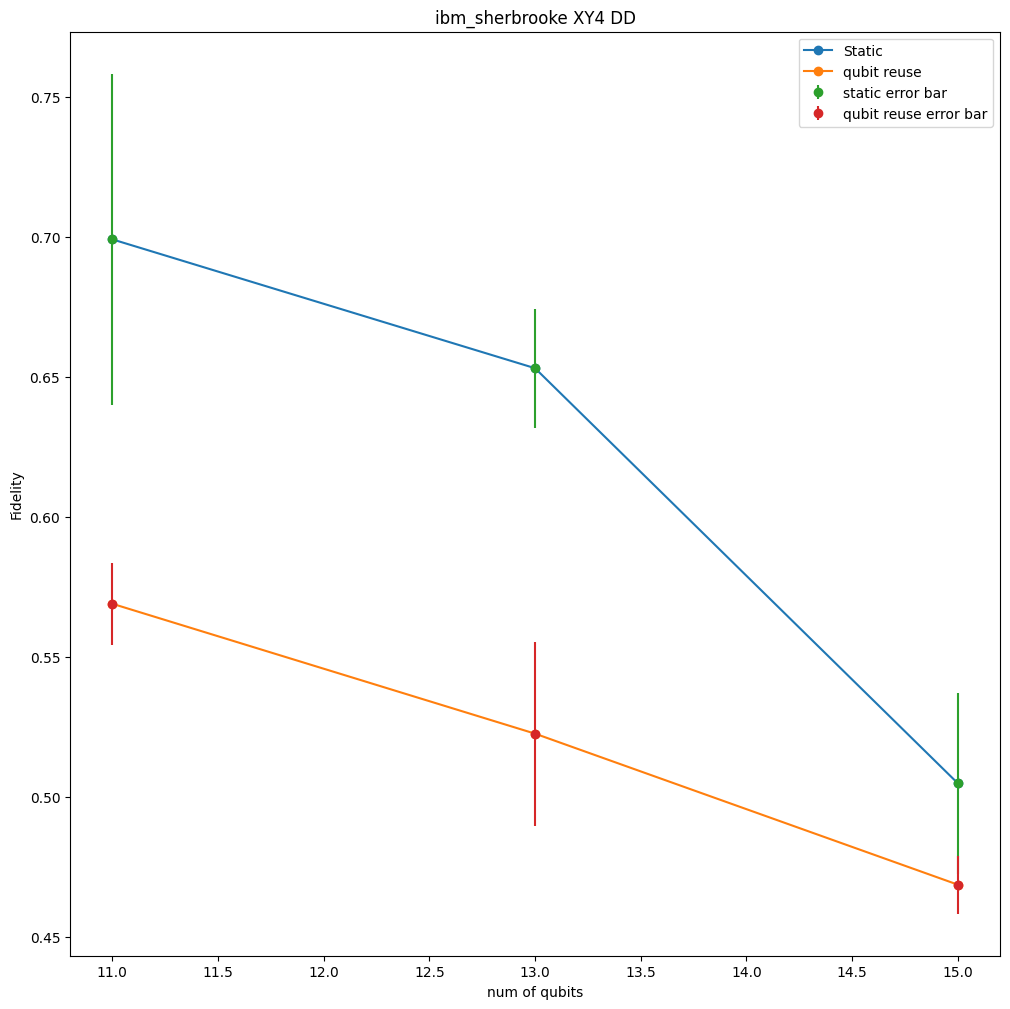

In [103]:
# Graph plotting
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
#figure(figsize=(16,12), dpi=180)
fig, ax1 = plt.subplots(1, 1, figsize=(12,12))

# Create  data.
ax1.set_xlabel('num of qubits')
ax1.set_ylabel('Fidelity')
ax1.set_title('ibm_sherbrooke XY4 DD')

x1 = num_qubit_list
y1_static = Fidelity_mean_static_sherbrooke
#y1_dynamic_1 = Fidelity_mean_dynamic_1_sherbrooke
y1_dynamic_2 = Fidelity_mean_dynamic_2_sherbrooke
print(y1_static)
#print(y1_dynamic_1)
print(y1_dynamic_2)

y_error_static =Fidelity_std_static_sherbrooke
#y_error_dynamic_1 =Fidelity_std_dynamic_1_sherbrooke
y_error_dynamic_2 =Fidelity_std_dynamic_2_sherbrooke
print(y_error_static)
#print(y1_dynamic_1)
print(y_error_dynamic_2)

ax1.plot(x1, y1_static, 'o-',label='Static')
#ax1.plot(x1, y1_dynamic_1, 'o-',label='dynamic_1')
ax1.plot(x1, y1_dynamic_2, 'o-',label='qubit reuse')
ax1.errorbar(x1, y1_static,
			yerr = y_error_static, label='static error bar',
			fmt ='o')
#ax1.errorbar(x1, y1_dynamic_1,
			#yerr = y_error_dynamic_1, label='dynamic_1',
			#fmt ='o')
ax1.errorbar(x1, y1_dynamic_2,
			yerr = y_error_dynamic_2, label='qubit reuse error bar',
			fmt ='o')


plt.legend()
plt.show()

In [108]:
import json
import qiskit.qasm3
import base64

#Static and plugin modified circuit
qc = get_ghz_circ_static(num_qubit=7)
qc1 = get_ghz_circ_dynamic_2(num_qubit=7)

# Convert plot image to Base64
with open("ghz_graph.png", "rb") as f:
    plot_data = base64.b64encode(f.read()).decode('utf-8')

# Convert to a dictionary
# qc_dict = qc.to_dict()
# "Mnimum qubit number:": result_metric_real['usage']['seconds'],

data = {
    "Hardware_name:": backend_name,
    "Static circuit:": qiskit.qasm3.dumps(qc),
    "Plugin modified circuit:": qiskit.qasm3.dumps(qc1),
    "Qubit number list:": num_qubit_list,
    "Total copies:": copies,
    "Ideal simulator results:": counts_list_ideal,
    "Job Id:": job.job_id(),
    "Job metrics": result_metric_real,
    "DD pulse:": options.dynamical_decoupling.sequence_type,
    "Real hardware results:": counts_list_real,
    "Mean plots static circuit:": y1_static,
    "Mean plots plugin modified circuit:": y1_dynamic_2,
    "Error plots static circuit:": y_error_static,
    "Error plots plugin modified circuit:": y_error_dynamic_2,
    "plot": plot_data
}

with open("ghz_test.json", "w") as f:
    json.dump(data, f, indent=4)